In [13]:
import pandas as pd
import matplotlib.pyplot as plt

#create subframes for easier exploration
df = pd.read_csv('fakestudentrecords.csv')
df_csgpa = df[['Q1_CS_GPA', 'Q2_CS_GPA','Q3_CS_GPA','Q4_CS_GPA','Q5_CS_GPA']]
df_csunits = df[['Q1_CS_Units','Q2_CS_Units', 'Q3_CS_Units', 'Q4_CS_Units', 'Q5_CS_Units']]

In [ ]:
#THINGS TO EXPLORE

#1. understand typical amount of units a student would take compared to the total units they would take (done through checking mean units taken throughout the quarters and finding relationships)
#3. understand the trend of GPA between the means, with the CS and normal GPA
#3. understand relations between CS GPA and the CS units
#4. group by quarter and check the trend of GPAs in the recent quarters
#5. Draw up correlation heatmap and see the potential issues
#6. Discuss training a model that can predict future outcomes given enough data

In [4]:
#analysis of column names and such

print(df.columns)
print(df.head)

Index(['StudentID', 'Q1_Timestamp', 'Q1_CS_GPA', 'Q1_Overall_GPA',
       'Q1_CS_Units', 'Q1_Total_Units', 'Q2_Timestamp', 'Q2_CS_GPA',
       'Q2_Overall_GPA', 'Q2_CS_Units', 'Q2_Total_Units', 'Q3_Timestamp',
       'Q3_CS_GPA', 'Q3_Overall_GPA', 'Q3_CS_Units', 'Q3_Total_Units',
       'Q4_Timestamp', 'Q4_CS_GPA', 'Q4_Overall_GPA', 'Q4_CS_Units',
       'Q4_Total_Units', 'Q5_Timestamp', 'Q5_CS_GPA', 'Q5_Overall_GPA',
       'Q5_CS_Units', 'Q5_Total_Units'],
      dtype='object')
<bound method NDFrame.head of     StudentID  Q1_Timestamp  Q1_CS_GPA  Q1_Overall_GPA  Q1_CS_Units  \
0           1        202308       3.25            3.22           11   
1           2        202108       2.77            2.68            8   
2           3        202203       3.73            3.68           13   
3           4        202208       2.70            3.07           12   
4           5        202108       3.37            3.40            9   
5           6        202401       3.16            3.08     

Q1: 25th percentile = 9.25 , 75th percentile = 15.0
Q2: 25th percentile = 9.0 , 75th percentile = 13.0
Q3: 25th percentile = 10.0 , 75th percentile = 13.0
Q4: 25th percentile = 10.0 , 75th percentile = 13.0
Q5: 25th percentile = 10.25 , 75th percentile = 15.0
Mean units over all quarters:
 Q1_CS_Units    12.24
Q2_CS_Units    11.64
Q3_CS_Units    11.84
Q4_CS_Units    11.72
Q5_CS_Units    12.26
dtype: float64 

Mean total units over all quarters:
 Q1_Total_Units    14.52
Q2_Total_Units    13.50
Q3_Total_Units    13.74
Q4_Total_Units    13.90
Q5_Total_Units    14.30
dtype: float64 



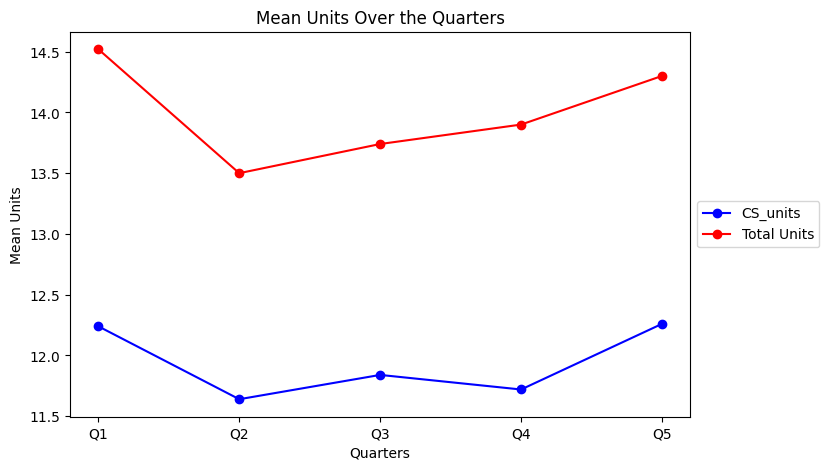

In [24]:
# Explore percentiles of CS units taken from quarter to quarter
print("Q1: 25th percentile =", df['Q1_CS_Units'].quantile(0.25), ", 75th percentile =", df['Q1_CS_Units'].quantile(0.75))
print("Q2: 25th percentile =", df['Q2_CS_Units'].quantile(0.25), ", 75th percentile =", df['Q2_CS_Units'].quantile(0.75))
print("Q3: 25th percentile =", df['Q3_CS_Units'].quantile(0.25), ", 75th percentile =", df['Q3_CS_Units'].quantile(0.75))
print("Q4: 25th percentile =", df['Q4_CS_Units'].quantile(0.25), ", 75th percentile =", df['Q4_CS_Units'].quantile(0.75))
print("Q5: 25th percentile =", df['Q5_CS_Units'].quantile(0.25), ", 75th percentile =", df['Q5_CS_Units'].quantile(0.75))

# Calculate and print the mean CS units over all quarters
mean_cs_units = df[['Q1_CS_Units', 'Q2_CS_Units', 'Q3_CS_Units', 'Q4_CS_Units', 'Q5_CS_Units']].mean()
print("Mean units over all quarters:\n", mean_cs_units, '\n')

#calculate and print the mean of all units over all quarters
mean_units = df[['Q1_Total_Units', 'Q2_Total_Units', 'Q3_Total_Units', 'Q4_Total_Units', 'Q5_Total_Units']].mean()
print("Mean total units over all quarters:\n", mean_units, '\n')


quarters = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
#plot the trend of mean CS units over all quarters
plt.figure(figsize=(8, 5))
plt.plot(quarters, mean_cs_units.values, marker='o', linestyle='-', color='b', label = 'CS_units')
plt.plot(quarters, mean_units.values, marker = 'o', linestyle ='-', color = 'r', label = 'Total Units')
plt.title('Mean Units Over the Quarters')
plt.xlabel('Quarters')
plt.ylabel('Mean Units')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

In [ ]:
'''
Analysis:

1. Discuss findings, downtrend in Q2, CS almost consistent from Q2-Q4 while total units grows suggesting exploration of otehr classes / GEs, then upturn in CS units while continuing the uptrend in units, suggesting larger amounts of coursework.

'''